# Reinforcement Learning <a name="Exercise"></a>

## [RL - Exercise](https://fhict.instructure.com/courses/13057/assignments/219963?module_item_id=921380)

### Relevant Modules
[RL - How to apply?](https://fhict.instructure.com/courses/13057/pages/rl-how-to-apply?module_item_id=921379) <br/>
[RL - Theoretical background](https://fhict.instructure.com/courses/13057/pages/rl-theoretical-background?module_item_id=921378) <br/>


### Description
Now you finished the assignments working with Gym it's time for the real thing.

Find a game you like and create a reinforcement agent that can play this game. This can be any game, but remember that you have to be able to access or being able to calculate the three main parameters of reinforcement learning: state, action and reward. If you want to play the Gym Atari games, tak a look at this [dead link](docker) docker container.

### Deliverable
Hand in a research report that contains a link to your documented code in Git (the school's GitlabLinks to an external site.), the results and methods you used to achieve the results.

***
 

## Update: Due-date changed <a name="Update"></a>
Dear Students,

I trust you are making great progress in developing your RL agents! I am eagerly looking forward to seeing the submissions.

However, before you submit your work, I would like to share some general guidelines to help you improve the quality of your work.

It is important to not only explain the code but also provide a detailed interpretation of the actions and performance of the agent. To support your claims, use graphs, KPIs, and quantitative measures wherever possible to reason about the outcome. For example, it is crucial to demonstrate how you have verified that your agent is learning anything at all. Provide evidence to support your claims and make sure that your analysis is based on reproducible data. Note that DQN training can become unstable. Solutions to this problem are in the paper below.

A great way to learn is to Experiment with a few different environments and ways of building your agent. Compare various options and make informed experimental decisions that can help improve the learning behavior of the agent.

Don't forget to include references to any sources you have used to support your work.

Let us extend the deadline by two weeks to make sure you have enough time to get to the quality right.

I am looking forward to seeing your agents!

Best regards,

Iman.

PS.1 Once you get your code working, this can be an interesting paper to give you directions for experimentation and explorations: [Rainbow: Combining Improvements in Deep Reinforcement Learning (arxiv.org)](https://arxiv.org/pdf/1710.02298.pdf)

***

[GitLab FHICT](https://git.fhict.nl/I446960/rl_exercise) (containing all the code)

[GoogleDrive](https://drive.google.com/drive/folders/1o70tK_dfbpPip3ZLRIv43aAHtURjHLOK?usp=share_link) (containing trained models)


***


## Table of contents <a name="Table"></a>
- [Exercise statement](#Exercise)
    - [Update, Canvas announcement](#Update)
- [Table of contents](#Table)
- [Imports, Environment 1](#ENV_1)
- [Failed experiments](#Exp)
- [Training models](TRAIN)
    - [DQN](#DQN)
    - [PPO](#PPO) 
    - [A2C](#A2C)
- [Other Visualizations](#VIS_OTHER)
    - [Boxplot with results](#BOX) per trained model
    - [GIF](#GIF)
- [Sources](#SOURCE)







***

## Imports, environment 1 <a name="ENV_1"></a>

Here we see the imports used in the first environment. We modify some packages so there is also a second import, to use that instead restart the kernal and dont run any codeblocks before it.

In [3]:
import os
from datetime import datetime
import time
import random
import math

import gymnasium as gym
import tensorflow as tf
import keras

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import numpy as np
import pandas as pd

import torch

from nes_py.wrappers import JoypadSpace

from gym.wrappers import FrameStack, GrayScaleObservation

import stable_baselines3 as sb3
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

######################
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}

print(tf.__version__ + "-TensorFlow")
print(keras.__version__+ "-Keras")
print(gym.__version__+ "-Gym")
print(torch.__version__+ "-PyTorch")
print(gym.__version__+ "-Gymnasium")
print(matplotlib.__version__+ "-Matplotlib")
print(pd.__version__+ "-Pandas")
print(np.__version__+ "-Numpy")

print(torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.current_device(), torch.cuda.device(0), torch.cuda.get_device_name(0))

2.12.0-TensorFlow
2.12.0-Keras
0.28.1-Gym
2.0.0+cu118-PyTorch
0.28.1-Gymnasium
3.7.1-Matplotlib
2.0.0-Pandas
1.23.5-Numpy
True 1 0 <torch.cuda.device object at 0x00000239278FCE90> NVIDIA GeForce RTX 2080


## First attempt at at creating env and models <a name="Exp"></a>

In this section I discuss and show some code that I used when starting the project. This code is in the end not functional, see later sections for that. Issue was that the packages sometimes expect the older version of gym (not gymnasium) and that when writing a wrapper & editing packages I came accros a better solution.



## Set up env

This [Guide](https://www.youtube.com/watch?v=dWmJ5CXSKdw) was used for the coming few codeblocks


In [2]:
# https://gymnasium.farama.org/environments/atari/ms_pacman/
env = gym.make("ALE/MsPacman-v5")

actions = env.action_space.n
# actions = actions.n

# x = env.observation_space.shape[0]
# y = env.observation_space.shape[1]
# c = env.observation_space.shape[2]
x, y, c = env.observation_space.shape


# env.get_action_meanings()
print(actions) # Should be 9 according to link
print(x, y, c) # Should be (210, 160, 3) according to link


# MOVES = [['NOOP'],
#         ['up'],
#         ['right'],
#         ['left'],
#         ['down'],
#         ['up', 'right'],
#         ['up', 'left'],
#         ['down', 'right'],
#         ['down', 'left']]

9
210 160 3


Here we try to see if environment was created succesfully. We print the amount of moves that should be available (9) and the dimensions of the Observation shape 210x160 and x3 for the colours.

### Check env for random actions

Here we see how a random agaent would do on this env

C:\Users\luukv\anaconda3\envs\RL\Lib\site-packages\gymnasium\utils\passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


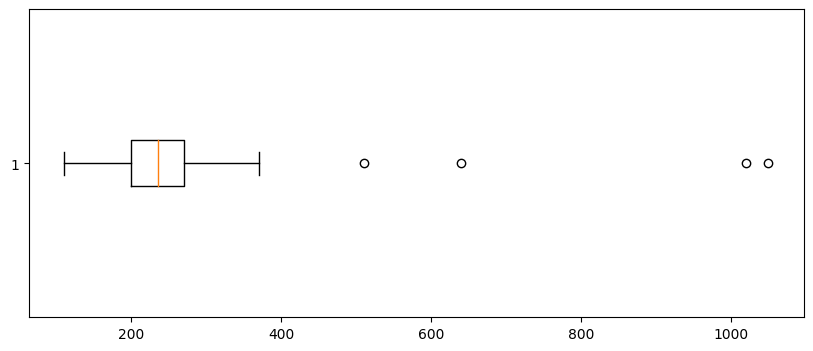

In [3]:
env = gym.make("ALE/MsPacman-v5", render_mode='rgb_array') # Supported modes: `human`, `rgb_array`.

# Source: the default lunar lander:
# https://gymnasium.farama.org/

res = []
episodes = 100

for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        
        action = env.action_space.sample() # = random.randint(0, 8)
        n_state, reward, done, trunc, info = env.step(action)
        score += reward

    res.append(score)
    print('ep: {}, score: {}'.format(episode, score), end='\r') 
    
fig = plt.figure(figsize =(10, 4)) 
plt.boxplot(res, vert=False)
plt.show()
env.close()

We can see in the plot above that the median score is about 250 (and there are  outliers scoring around 1100) for an agent that takes random actions.

***

## Build Deep Learning Model

In the section below we try to make a grayscale for the env, make sure that we use framestack and vectorize the environmen. This leads to a heap of issues with the packages








In [6]:
print(torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.current_device(), torch.cuda.device(0), torch.cuda.get_device_name(0))


True 1 0 <torch.cuda.device object at 0x0000015678FC4D50> NVIDIA GeForce RTX 2080


In [7]:
env = gym.make("ALE/MsPacman-v5", render_mode = 'rgb_array') # Supported modes: `human`, `rgb_array`. (defaults to?)

# env = JoypadSpace(env, MOVES)

# Greyscale it
env = gym.wrappers.GrayScaleObservation(env, keep_dim=True)

env = DummyVecEnv([lambda: env])

env = VecFrameStack(env, 4, channels_order='last')

Box(0, 255, (210, 160, 1), uint8)


As we can see in the picture below the VecFrameStack gives issues to the env. 

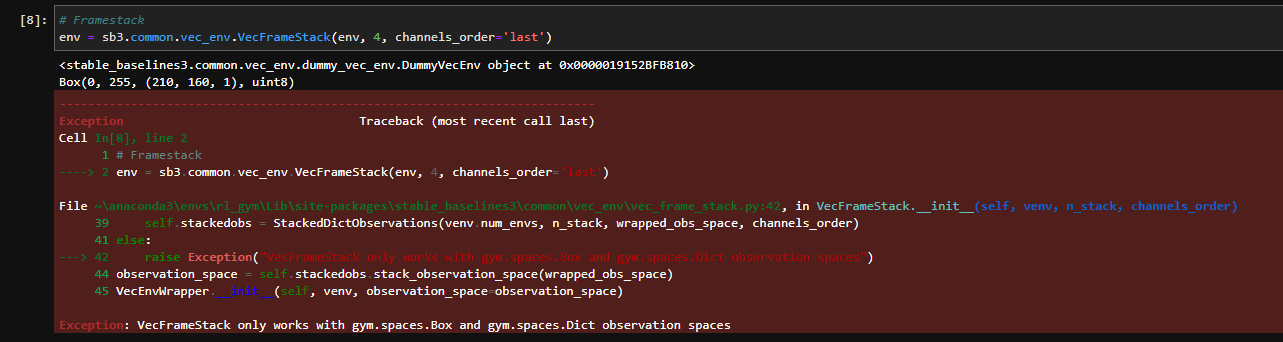

this was solved by digging into the package and disabling the check for gym.spaces.Box as gymnasium.spaces.Box was unkown.

Other issues came up as well. Most were fixable by editing the packages code but the one below made me abandon making my own wrapper as fixing this was too much of a headache

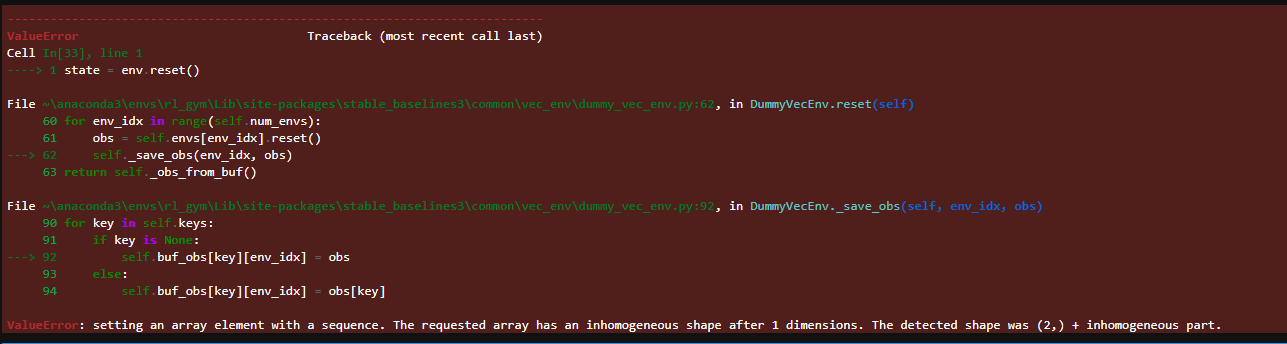

In [8]:
state = env.reset()

In [9]:
state.shape

(1, 210, 160, 4)

In [10]:
action = env.action_space.sample() # = random.randint(0, 8)
state, reward, done, info = env.step([action])


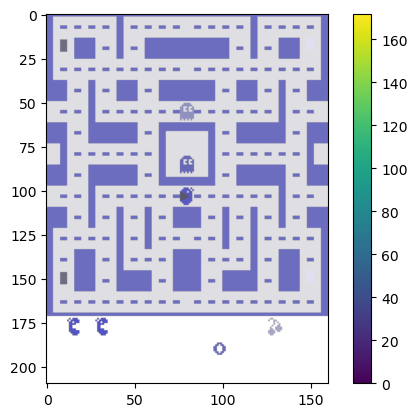

In [11]:
plt.figure()
plt.imshow(state[0])
plt.colorbar()
plt.grid(False)
plt.show()

Here we see the env in greyscale (matplot sets this to default colormap) 

In [12]:
i=0

while i < 150: #tends to die at 200-300
    state, reward, done, info = env.step([2])
    i+=1

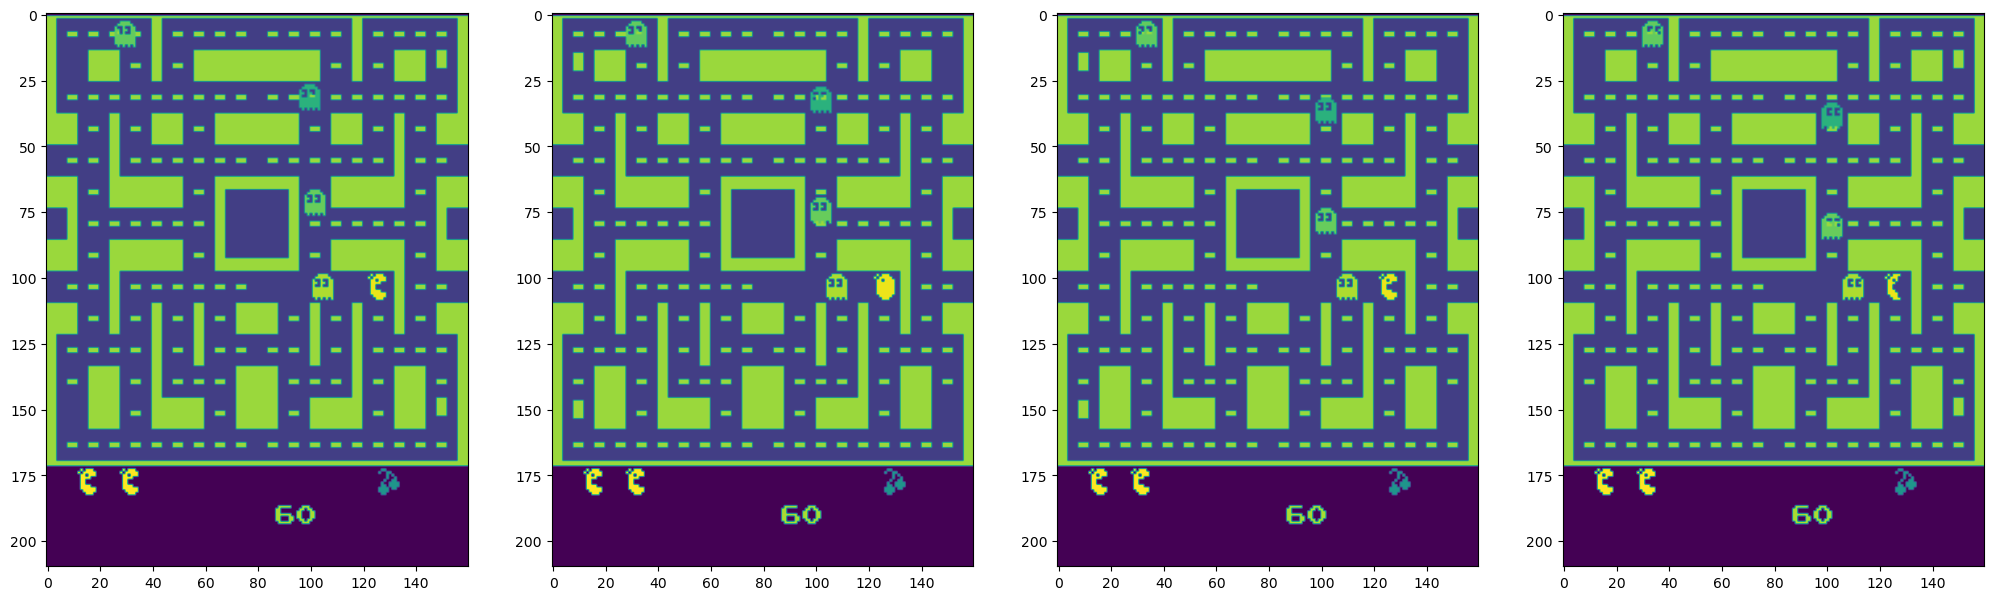

In [13]:
plt.figure(figsize=(25, 20))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

Here we see the framestacking for 4 frames.

***

# Training the Models <a name="TRAIN"></a>

As stated above making our own wrapper gave some insight into how the atari games are prepared for reinforcement learning. But since editing the packages is a lot of work an alternative could be beneficial. It turns out that stable-baselines3 already provides an atari wrapper which makes all the work above obsolete.

stable-baselines3 also provides implemations of reinforcement learning algorithms such as SAC, TD3, DDPG, DQN and many more.

I've decided to use this framework as it lines up nicely with the exercise goals.

## Imports, environment 2 <a name="ENV_2"></a>

We need new imports since we're working on a new virtual environment, the old one contains packages I messed with.

In [105]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}

from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO

# from sb3_contrib import RecurrentPPO

from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack

from stable_baselines3.common.callbacks import BaseCallback

from stable_baselines3.common.atari_wrappers import WarpFrame
from stable_baselines3.common.atari_wrappers import MaxAndSkipEnv

import imageio 

import torch

import numpy as np
import pandas as pd

import gymnasium as gym
from gymnasium import wrappers

import os
import random
import datetime

import matplotlib
from matplotlib import pyplot as plt

CHECKPOINT_DIR = './saved_models/'
LOG_DIR = './logs/'


print(torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.current_device(), torch.cuda.device(0), torch.cuda.get_device_name(0))

True 1 0 <torch.cuda.device object at 0x0000022945E80D10> NVIDIA GeForce RTX 2080


In [2]:
class NewCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, name='model', verbose=1):
        super(NewCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        self.name = name
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_{}_{}'.format(self.name, self.n_calls))
            self.model.save(model_path)
            
        return True
    
total_step = 1_500_000
check_freq = 500_000

In the codeblock above a callback function is defined. This function is used on every step. If the steps modulo equates to 0 the model is saved (see: def \_on\_step(self)) 

In [ ]:
# env = gym.make("ALE/MsPacman-v5")


# env = MaxAndSkipEnv(env, 4)
# env = WarpFrame(env, 672, 672)


# Cnn = Images
# Mlp = Data (csv, json, etc.)


# entropy_loss         DOWN 
# loss                 DOWN 
# value_loss           DOWN 

# explained_variance   UP 

***

## DQN (Default)  <a name="DQN"></a>

Below a set of models will be trained using the DQN reinforcement learning algorithm. See end of chapter for visualisations and results.

In [ ]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)
    
model_name = 'DQN_DEF'

model = DQN(
    "CnnPolicy", 
    env, 
    verbose=1, 
    tensorboard_log=LOG_DIR, 
    buffer_size=1_000_000,
    batch_size=32,
    learning_starts=50_000,
    target_update_interval=10_000,    
    learning_rate=0.0001,
    train_freq=4,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.05,
    exploration_fraction=0.1
)


Above we define the first DQN_model that will be used. This model has a lot of parameters but only the parameters for policy & env are required. For policy we use CNNPolicy, the other policies (such as Mlp) are more appropriate for tabular data while we use a descrete action space.

The other values given are optional parameters as their default according to the [docs](https://stable-baselines3.readthedocs.io/en/master/_modules/stable_baselines3/dqn/dqn.html#DQN)

The default values from stable-baselines3 is dervied from this [paper](https://arxiv.org/abs/1312.5602) (according to the docs)

In [ ]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

The model is put to learn. Input is the total steps we defined 2 blocks above, the callback function made & the log name for the tensorboad_log.



Also, the output has been removed for these models, setting the verbose to 1 gets the output as seen below. But since I use Tensorboard this is not that usefull to me as this can all be seen there as well. Also the performance actually drops significantly after a lot of episodes (i.e. the notebook cant handle too much output.)



Start:

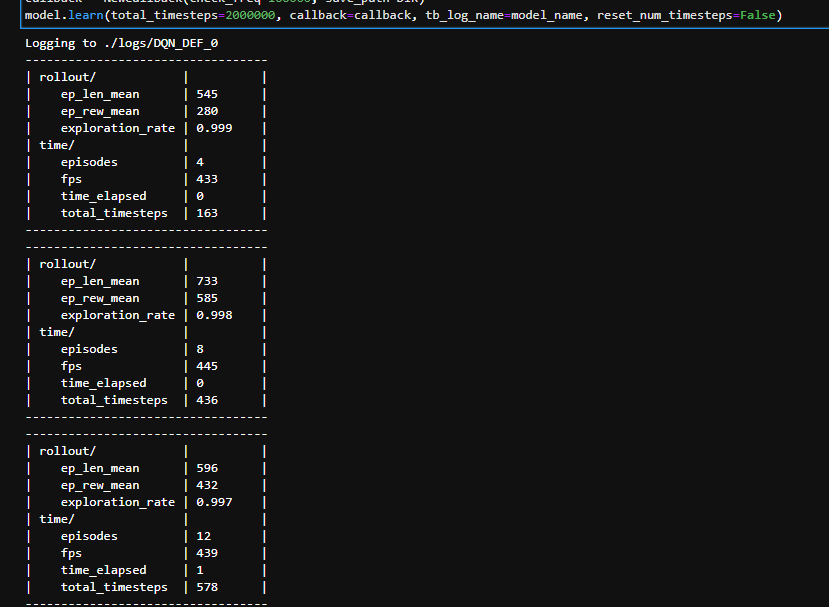


End:

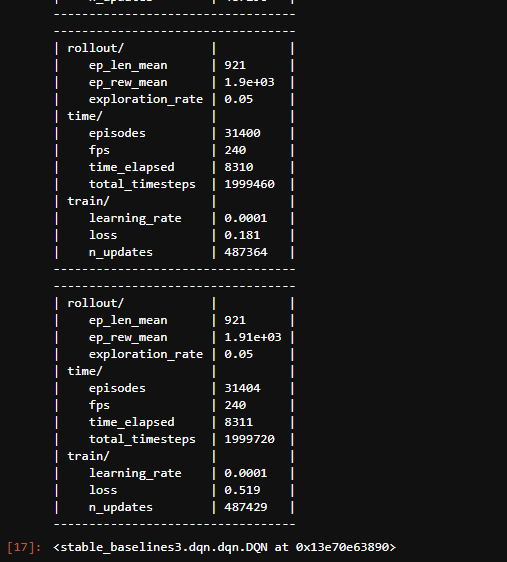

***

# DQN (Finetuned)


### Iteration 1

In [ ]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)

model_name = 'DQN_FINE_1'
    
model = DQN(
    "CnnPolicy", 
    env, 
    verbose=0, 
    tensorboard_log=LOG_DIR, 
    buffer_size=1_000_000,
    batch_size=32,
    learning_starts=10_000,
    target_update_interval=10_000,    
    learning_rate=0.00001, 
    train_freq=4,
    exploration_initial_eps=1.5,
    exploration_final_eps=0.05,
    exploration_fraction= 0.1
)


similar idea as above but some parameters are changed to see how it impacts the models ability to learn. First off all, the learning starts is lowered to 10k. Secondly the learning rate is raised by a factor of 10. The Exploration_inital_eps is also made lower, which lowers the random action probability.

I expect that this model does not differ much from the first model. Since the learning starts is lowerd the curve should start (40k) steps sooner. And with the learning rate a bit higher the curve might also become steeper sooner. However, with the exploration inital eps lowered the model might not find good moves as quick as the other models. 

In [7]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Iteration 2

In [ ]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)
    
model_name = 'DQN_FINE_2'

model = DQN(
    "CnnPolicy", 
    env, 
    verbose=0, 
    tensorboard_log=LOG_DIR, 
    buffer_size=1_000_000,
    batch_size=32,
    learning_starts=50_000,
    target_update_interval=100,   
    learning_rate=0.0001,
    train_freq=2, 
    exploration_initial_eps=1.0,
    exploration_final_eps=0.05,
    exploration_fraction=0.1
)


For this model the target update interval is significantly lowered. This should ensure that the target network can quickly be improved if the model finds drastically better steps to take. The training frequency is also halved which should ensure the model is updated twice as much.

This model might improve more quickly if it finds good moves.

In [5]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Iteration 3

In [4]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)
    
model_name = 'DQN_FINE_3'


model = DQN(
    "CnnPolicy", 
    env, 
    verbose=0, 
    tensorboard_log=LOG_DIR, 
    buffer_size=100_000, 
    batch_size=32,
    learning_starts=10_000, 
    target_update_interval=10_000,   
    learning_rate=0.00001,
    train_freq=4,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.005, 
    exploration_fraction=0.1
)   

For this model, quite a bit is changed. Fist off all, the buffer_size is lowered by a factor of 10. This is mostly due to getting warnings that the models are too big which could be avoided with a smaller buffer, but this might impact performance. Besides that the learning start is 40k sooner and the learning rate is lower by a factor of 10. The final exploration final eps is also lowered which should mean there is less exploration later on in last few episodes.

In [5]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Iteration 4 (FINAL)

In [6]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)

model_name = 'DQN_FINE_4'
    
model = DQN(
    "CnnPolicy", 
    env, 
    verbose=0, 
    tensorboard_log=LOG_DIR, 
    buffer_size=10_000, 
    batch_size=32,
    learning_starts= 10_000, 
    target_update_interval=1_000,
    learning_rate=0.0001, 
    train_freq=4,
    exploration_initial_eps=1.0,
    exploration_final_eps= 0.01, 
    exploration_fraction= 0.1
)


For this model the buffer_size is lowered even more to 10k. The learning start is also sooner again at 10k. the target update interval is lowered to 1000 and the exploration for final episoed is also lowered. Reason for these values (buffersize, target update interval & exploration final eps) is because the documentation mention another research paper in which it is shownt that these do well in pyBullet environments. Which might translate to atari games as well. 

In [7]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Results

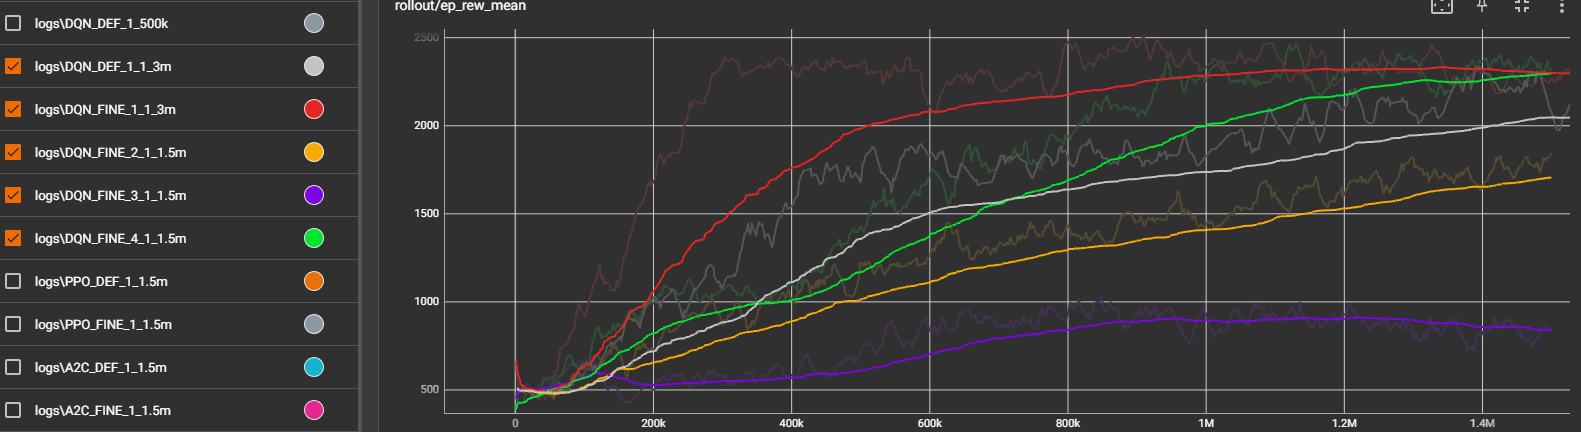

Looking at the mean reward per episode above we can see that FINE_4, FINE_1 do best. DEF_1 and FINE_2 also do rather well and are expected to catchup with FINE_1 if trained for longer. 



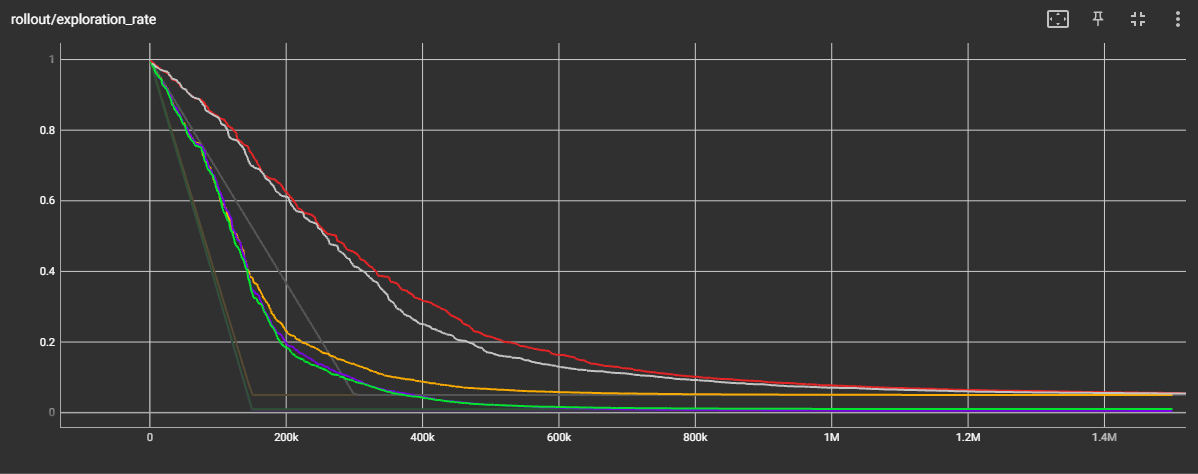

The exploration rate of the models. This is not so interesting for these models since we gave it static values. But SB3 also gives you the option to put in a lambda function which might make this graph more interesting 

***
# A2C  <a name="A2C"></a>


## A2C Default

In [12]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)

model_name = 'A2C_DEF'
    
model = A2C(
    "CnnPolicy", 
    env, 
    learning_rate=0.0007,
    n_steps=5, 
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5, 
    max_grad_norm=0.5, 
    rms_prop_eps=1e-05,
    use_rms_prop=True, 
    use_sde=False, 
    sde_sample_freq=-1, 
    normalize_advantage=False,
    stats_window_size=100,
    tensorboard_log=LOG_DIR, 
    policy_kwargs=None, 
    verbose=0, 
    seed=None, 
    device='auto', 
    _init_setup_model=True
)


Above we define the first A2C_model that will be used. Same as for the DQN: This model has a lot of parameters but only the parameters for policy & env are required. For policy we use CNNPolicy, the other policies (such as Mlp) are more appropriate for tabular data while we use a descrete action space.

The other values given are optional parameters as their default according to the [docs](https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html)

The default values from stable-baselines3 is dervied from this [paper](https://arxiv.org/abs/1602.01783) (according to the docs)

In [13]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)


***
## A2C Tuned

In [108]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=4)

model_name = 'A2C_FINE'
    
model = A2C(
    "CnnPolicy", 
    env, 
    learning_rate=0.00001,
    n_steps=1024, 
    gamma=0.99,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5, 
    max_grad_norm=0.5, 
    rms_prop_eps=1e-05,
    use_rms_prop=True, 
    use_sde=False, 
    sde_sample_freq=-1, 
    normalize_advantage=False,
    stats_window_size=100,
    tensorboard_log=LOG_DIR, 
    policy_kwargs=None, 
    verbose=0, 
    seed=None, 
    device='auto', 
    _init_setup_model=True
)



The learning rate is lowered and the n_steps is made higher. The reason for this is that we're running the model for 1.5m episodes so the learning rate could be a bit on the lower end. As for the n_steps a higher number should give the model more room to explore before being updated.

In [15]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Results


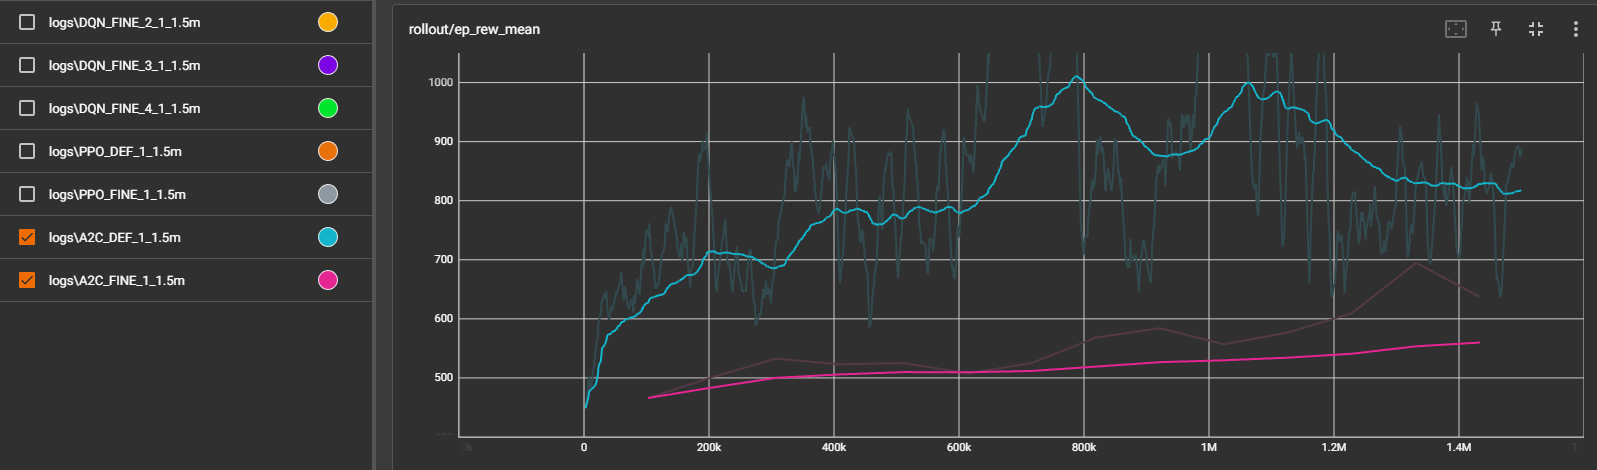

We can see that the finetuned A2C is a complete failure. The model does not perform well at all. Making the n_steps so high has apparently ruined the amount of updates as well. When looking further into the docs I read that n_steps gets multiplied with the amount of n_env which is now set at 1. Perhaps this variable needs to be higher than 1 for A2C to function well.    



***

# PPO <a name="PPO"></a>



## PPO (Default)

In [8]:
torch.cuda.empty_cache() 

try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=8)

model_name = 'PPO_DEF'

model = PPO(
    "CnnPolicy", 
    env, 
    learning_rate=0.0003, 
    n_steps=2048, 
    batch_size=64, 
    n_epochs=10, 
    gamma=0.99, 
    gae_lambda=0.95, 
    clip_range=0.2, 
    clip_range_vf=None, 
    normalize_advantage=True, 
    ent_coef=0.0, 
    vf_coef=0.5, 
    max_grad_norm=0.5, 
    use_sde=False, 
    sde_sample_freq=-1, 
    target_kl=None, 
    stats_window_size=100, 
    tensorboard_log=LOG_DIR,
    policy_kwargs=None, 
    verbose=0, seed=None,
    device='auto', 
    _init_setup_model=True
)

Above we define the first PPO_model that will be used. Same as for the DQN: This model has a lot of parameters but only the parameters for policy & env are required. For policy we use CNNPolicy, the other policies (such as Mlp) are more appropriate for tabular data while we use a descrete action space.

The other values given are optional parameters as their default according to the [docs](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

The default values from stable-baselines3 is dervied from this [paper](https://arxiv.org/abs/1707.06347) (according to the docs)

In [9]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)


***

## PPO (Finetuned)


In [10]:
torch.cuda.empty_cache() 


try:
    env.reset() 
except:
    env = make_atari_env("ALE/MsPacman-v5", n_envs=1, seed=0)
    env = VecFrameStack(env, n_stack=8)

model_name = 'PPO_FINE'

model = PPO(
    "CnnPolicy", 
    env, 
    learning_rate=lambda progression: 2.5 * 1e-4 * progression,
    n_steps=128,
    batch_size=64, 
    n_epochs=8, 
    gamma=0.99, 
    gae_lambda=0.95, 
    clip_range=lambda progression: 0.1 * progression,
    clip_range_vf=None, 
    normalize_advantage=True, 
    ent_coef=0.01, 
    vf_coef=0.5, 
    max_grad_norm=0.5, 
    use_sde=False, 
    sde_sample_freq=-1, 
    target_kl=None, 
    stats_window_size=100, 
    tensorboard_log=LOG_DIR,
    policy_kwargs=None, 
    verbose=0, 
    seed=None,
    device='auto', 
    _init_setup_model=True
)

This fine tuned model is more interesting than the others. First off all, we can see that the learning rate and clip range are now lambda functions. This means that the values change as the model learns. This should give the model the ability to maximize the progress made when stumbeling on a good set of moves. The idea behind these values can be found  [here](https://arxiv.org/abs/1707.06347).


The ent_coef is also changed after seeing this [video](https://youtu.be/1ppslywmIPs) 

In [11]:
try:
    iteration =  len(os.listdir(CHECKPOINT_DIR + model_name)) 
except:
    iteration = 0
    
DIR = CHECKPOINT_DIR + model_name + '/' + str(iteration) + '/'

callback = NewCallback(check_freq=check_freq, save_path=DIR, name=model_name)
model.learn(total_timesteps=total_step, callback=callback, tb_log_name=model_name)

### Results


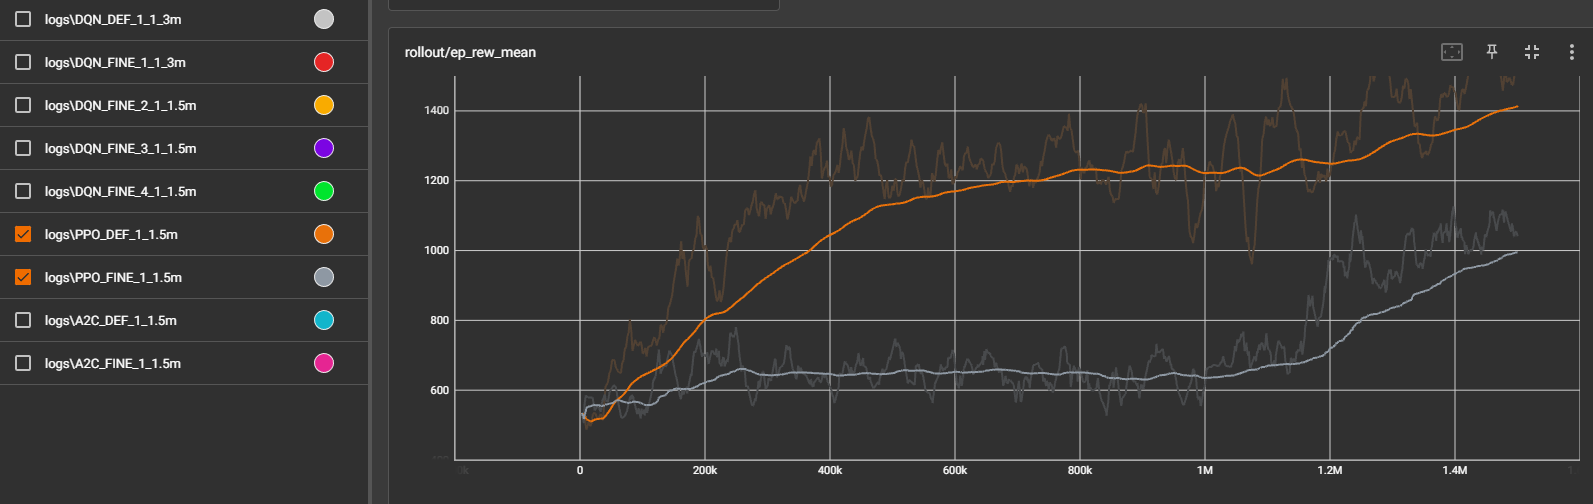
 
 We can see that the Fintuned PPO model starts out fairly poorly but steps up towards the end. It would've been interesting to see how more training wouldve affected the graph but the training time is already very long and thus I cant extend it.


***
All the models:


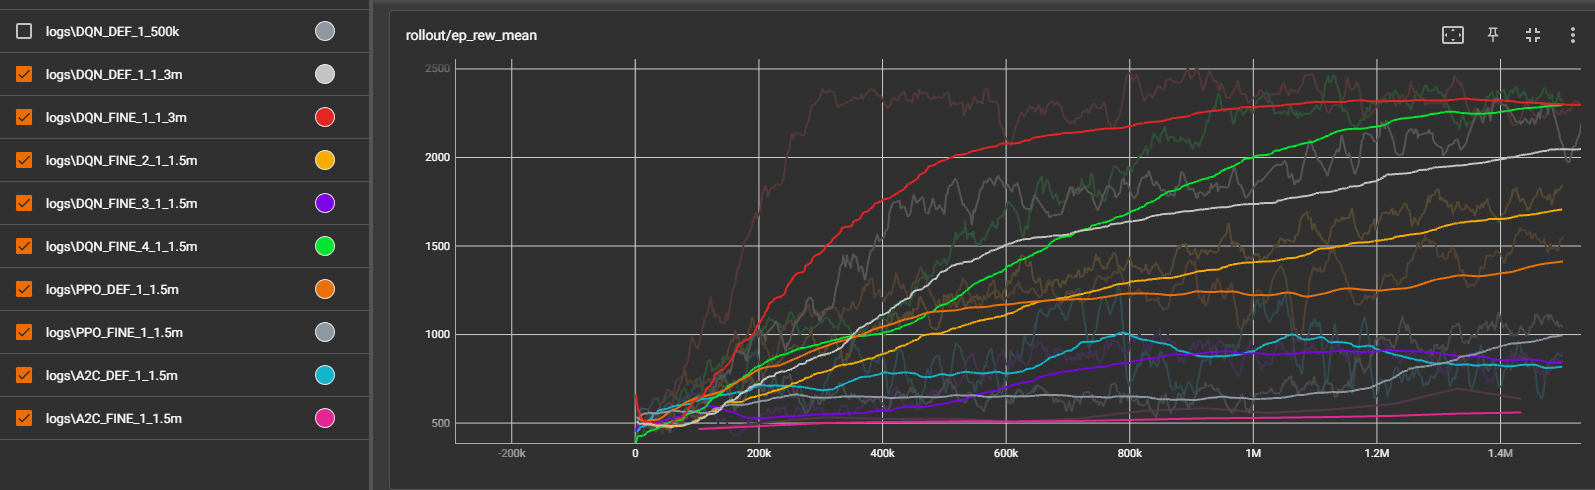

***
## Other Visualizations <a name="VIS_OTHER"></a>  

Below is the code to generate a boxplot with the performance for all trained models and generating a gif of trained models.

In [29]:
def get_boxplot_data(model, render='rgb_array', episodes = 100, isRandom=False):    
    res = []
    
    for episode in range(1, episodes+1):
        score = 0
        state = env.reset()
        done = False  

        while not done:
            env.render()
            
            if not isRandom:
                action, _ = model.predict(state)
                state, reward, done, info = env.step(action)
                
            else:      
                action = random.randint(0, 8)
                state, reward, done, info = env.step([action])
                
            score += reward
            env.render(render) 

        res.append(score[0])
        print('ep: {}, latest score: {}'.format(episode, score), end='\r') 
        
    env.close()
    
    print('///////////////////////////////////////////////') 
    return res

In [22]:
df = pd.read_csv('./etc/df_boxplot.csv')
df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3,DQN/Cnn-Agent\n Fine_4,A2C/Cnn-Agent\n Default,A2C/Cnn-Agent\n Finetuned,PPO/Cnn-Agent\n Default,PPO/Cnn-Agent\n Finetuned
0,2010.0,2690.0,1330.0,970.0,3380.0,1280.0,360.0,1740.0,830.0
1,2590.0,2260.0,2030.0,1030.0,2080.0,1090.0,270.0,3310.0,1020.0
2,2170.0,2040.0,1790.0,440.0,1910.0,900.0,840.0,2770.0,1970.0
3,2510.0,4660.0,3880.0,450.0,1620.0,1840.0,670.0,1470.0,1630.0
4,2290.0,1970.0,1470.0,880.0,1920.0,490.0,370.0,1410.0,250.0


***

Gathering the results for the boxplot of agents performance:

### A2C results

In [ ]:
env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

model_A2C_DEFA = A2C.load('./trained_models/A2C_DEF/0/best_A2C_DEF_1500000')
model_A2C_FINE = A2C.load('./trained_models/A2C_FINE/0/best_A2C_FINE_1500000')


res_A2C_DEFA = get_boxplot_data(model_A2C_DEFA, 'rgb_array', 100)
res_A2C_FINE = get_boxplot_data(model_A2C_FINE, 'rgb_array', 100)

In [17]:
df['A2C/Cnn-Agent\n Default'] = res_A2C_DEFA
df['A2C/Cnn-Agent\n Finetuned'] = res_A2C_FINE

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3,DQN/Cnn-Agent\n Fine_4,A2C/Cnn-Agent\n Default,A2C/Cnn-Agent\n Finetuned
0,2010.0,2690.0,1330.0,970.0,3380.0,1280.0,360.0
1,2590.0,2260.0,2030.0,1030.0,2080.0,1090.0,270.0
2,2170.0,2040.0,1790.0,440.0,1910.0,900.0,840.0
3,2510.0,4660.0,3880.0,450.0,1620.0,1840.0,670.0
4,2290.0,1970.0,1470.0,880.0,1920.0,490.0,370.0


### PPO results

In [ ]:
env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

model_PPO_DEFA = PPO.load('./trained_models/PPO_DEF/0/best_PPO_DEF_1500000')
model_PPO_FINE = PPO.load('./trained_models/PPO_FINE/0/best_PPO_FINE_1500000')

res_PPO_DEFA = get_boxplot_data(model_PPO_DEFA, 'rgb_array', 100)
res_PPO_FINE = get_boxplot_data(model_PPO_FINE, 'rgb_array', 100)

In [18]:
df['PPO/Cnn-Agent\n Default'] = res_PPO_DEFA
df['PPO/Cnn-Agent\n Finetuned'] = res_PPO_FINE

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3,DQN/Cnn-Agent\n Fine_4,A2C/Cnn-Agent\n Default,A2C/Cnn-Agent\n Finetuned,PPO/Cnn-Agent\n Default,PPO/Cnn-Agent\n Finetuned
0,2010.0,2690.0,1330.0,970.0,3380.0,1280.0,360.0,1740.0,830.0
1,2590.0,2260.0,2030.0,1030.0,2080.0,1090.0,270.0,3310.0,1020.0
2,2170.0,2040.0,1790.0,440.0,1910.0,900.0,840.0,2770.0,1970.0
3,2510.0,4660.0,3880.0,450.0,1620.0,1840.0,670.0,1470.0,1630.0
4,2290.0,1970.0,1470.0,880.0,1920.0,490.0,370.0,1410.0,250.0


### DQN results 

#### Default DQN

In [ ]:
#DQN is so big the kernel needs to be restarted for each model load (doenst clear out cache well enough?)
torch.cuda.empty_cache() 

model_DQN_DEFA_1 = DQN.load('./trained_models/DQN_DEF_1/7/best_DQN_DEF_3000000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_DQN_DEFA_1 = get_boxplot_data(model_DQN_DEFA_1, 'rgb_array', 100)

In [6]:
df['DQN/Cnn-Agent\n Default'] = res_DQN_DEFA_1

df.head()

,DQN/Cnn-Agent\n Default
0,2010.0
1,2590.0
2,2170.0
3,2510.0
4,2290.0


In [ ]:
df.to_csv('./etc/df_boxplot.csv', index=False)

#### Fine DQN 1

In [ ]:
torch.cuda.empty_cache() 

model_DQN_FINE_1 = DQN.load('./trained_models/DQN_FINE_1/0/best_DQN_FINE_1_2000000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_model_DQN_FINE_1 = get_boxplot_data(model_DQN_FINE_1, 'rgb_array', 100)

In [7]:
df['DQN/Cnn-Agent\n Fine_1'] = res_model_DQN_FINE_1

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1
0,2010.0,2690.0
1,2590.0,2260.0
2,2170.0,2040.0
3,2510.0,4660.0
4,2290.0,1970.0


In [ ]:
df.to_csv('./etc/df_boxplot.csv', index=False)

#### Fine DQN 2

In [ ]:
torch.cuda.empty_cache() 

model_DQN_FINE_2 = DQN.load('./trained_models/DQN_FINE_2/1/best_DQN_FINE_2_1500000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_model_DQN_FINE_2 = get_boxplot_data(model_DQN_FINE_2, 'rgb_array', 100)

In [8]:
df['DQN/Cnn-Agent\n Fine_2'] = res_model_DQN_FINE_2

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2
0,2010.0,2690.0,1330.0
1,2590.0,2260.0,2030.0
2,2170.0,2040.0,1790.0
3,2510.0,4660.0,3880.0
4,2290.0,1970.0,1470.0


In [9]:
df.to_csv('./etc/df_boxplot.csv', index=False)

#### Fine DQN 3

In [ ]:
torch.cuda.empty_cache() 

model_DQN_FINE_3 = DQN.load('./trained_models/DQN_FINE_3/1/best_DQN_FINE_3_1500000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_model_DQN_FINE_3 = get_boxplot_data(model_DQN_FINE_3, 'rgb_array', 100)

In [7]:
df['DQN/Cnn-Agent\n Fine_3'] = res_model_DQN_FINE_3

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3
0,2010.0,2690.0,1330.0,970.0
1,2590.0,2260.0,2030.0,1030.0
2,2170.0,2040.0,1790.0,440.0
3,2510.0,4660.0,3880.0,450.0
4,2290.0,1970.0,1470.0,880.0


In [19]:
df.to_csv('./etc/df_boxplot.csv', index=False)

#### Fine DQN 4

In [ ]:
torch.cuda.empty_cache() 

model_DQN_FINE_4 = DQN.load('./trained_models/DQN_FINE_4/0/best_DQN_FINE_4_1500000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_model_DQN_FINE_4 = get_boxplot_data(model_DQN_FINE_4, 'rgb_array', 100)

In [7]:
df['DQN/Cnn-Agent\n Fine_4'] = res_model_DQN_FINE_4

df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3,DQN/Cnn-Agent\n Fine_4
0,2010.0,2690.0,1330.0,970.0,3380.0
1,2590.0,2260.0,2030.0,1030.0,2080.0
2,2170.0,2040.0,1790.0,440.0,1910.0
3,2510.0,4660.0,3880.0,450.0,1620.0
4,2290.0,1970.0,1470.0,880.0,1920.0


In [8]:
df.to_csv('./etc/df_boxplot.csv', index=False)


#### Random agent

In [30]:
env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

res_random = get_boxplot_data(None, 'rgb_array', 100, True)

///////////////////////////////////////////////


In [31]:
df['Random'] = res_random
df.head()

,DQN/Cnn-Agent\n Default,DQN/Cnn-Agent\n Fine_1,DQN/Cnn-Agent\n Fine_2,DQN/Cnn-Agent\n Fine_3,DQN/Cnn-Agent\n Fine_4,A2C/Cnn-Agent\n Default,A2C/Cnn-Agent\n Finetuned,PPO/Cnn-Agent\n Default,PPO/Cnn-Agent\n Finetuned,Random
0,2010.0,2690.0,1330.0,970.0,3380.0,1280.0,360.0,1740.0,830.0,380.0
1,2590.0,2260.0,2030.0,1030.0,2080.0,1090.0,270.0,3310.0,1020.0,400.0
2,2170.0,2040.0,1790.0,440.0,1910.0,900.0,840.0,2770.0,1970.0,400.0
3,2510.0,4660.0,3880.0,450.0,1620.0,1840.0,670.0,1470.0,1630.0,810.0
4,2290.0,1970.0,1470.0,880.0,1920.0,490.0,370.0,1410.0,250.0,380.0


In [32]:
df.to_csv('./etc/df_boxplot.csv', index=False)

### Boxplot with results <a name="BOX"></a>

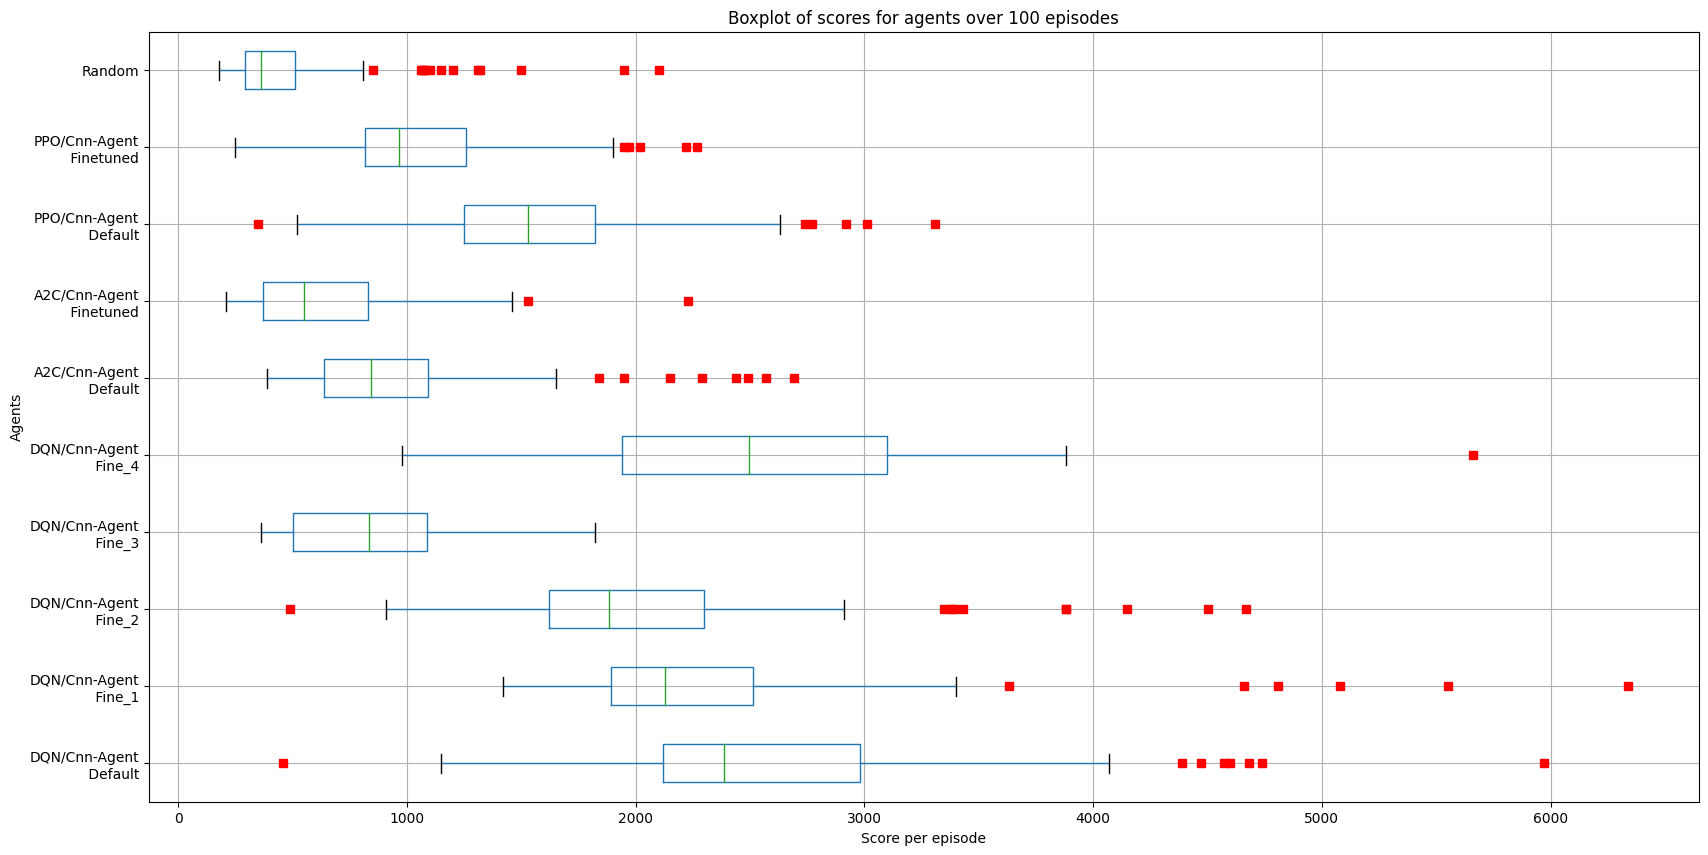

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

df = pd.read_csv('./etc/df_boxplot.csv')

ax = df.boxplot(grid=True, vert=False, sym='rs')
#flierprops={'marker': 'rs', 'markersize': 6, 'markerfacecolor': 'red'})

ax.set_title('Boxplot of scores for agents over 100 episodes')
ax.set_xlabel('Score per episode')
ax.set_ylabel('Agents')

plt.show()

As can be seen in the graph above, every agent out-performs a purely random agent. Since the means over 100 episodes is higher than the mean of a random agent.

We can also see that tweaking the hyperparameters for the models is mostly unsuccesfull. Only DQN_Fine_4 outperforms their Default 

***

### GIF <a name="GIF"></a>

Below are some GIFs created by using imagio and the now familiar training loop.

In [54]:
torch.cuda.empty_cache() 

model = DQN.load('./trained_models/DQN_FINE_4/0/best_DQN_FINE_4_1500000')

env_kwargs = {'terminal_on_life_loss': False, 'clip_reward': False }
env = make_atari_env("ALE/MsPacman-v5", wrapper_kwargs=env_kwargs, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)

images = []
state = env.reset()
img = env.render(mode="rgb_array")

done = False

while not done:
    images.append(img)
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    img = env.render(mode="rgb_array")

imageio.mimsave("./etc/DQN.gif", [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=10)

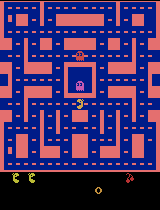

In [104]:
images = []
state = env.reset()
img = env.render(mode="rgb_array")
score = 0

while score < 5000:
    images = []
    state = env.reset()
    img = env.render(mode="rgb_array")
    
    score = 0
    done = False

    while not done:
        images.append(img)
        action, _ = model.predict(state)
        state, reward, done, info = env.step(action)
        score += reward
        img = env.render(mode="rgb_array")
    
imageio.mimsave("./etc/DQN_5k.gif", [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=10)

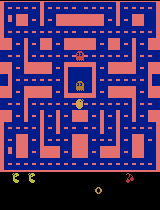

# Other Sources <a name="SOURCE"></a>

https://stackoverflow.com/questions/68599725/keras-rl2-error-attributeerror-sequential-object-has-no-attribute-compile-t

https://stackoverflow.com/questions/71894769/keras-attributeerror-adam-object-has-no-attribute-name

https://stackoverflow.com/questions/73978651/valueerror-error-when-checking-input-expected-flatten-input-to-have-shape-1

https://www.youtube.com/watch?v=LRgGSQGNZeE

https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3

https://github.com/DLR-RM/stable-baselines3/blob/master/docs/guide/examples.rst

https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/atari_games.ipynb#scrollTo=TgjfyOTPVxG6

***

https://www.youtube.com/watch?v=KMjQmG5Uzis

1.
https://www.youtube.com/watch?v=xER1otedZOQ

2.
https://www.youtube.com/watch?v=FGqxlt5UV4M



https://www.youtube.com/watch?v=HteW2lfwLXM


https://www.youtube.com/watch?v=dWmJ5CXSKdw&ab_channel=NicholasRenotte